In [0]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255.0, test_images / 255.0

170500096/170498071 [==============================] - 2s 0us/step


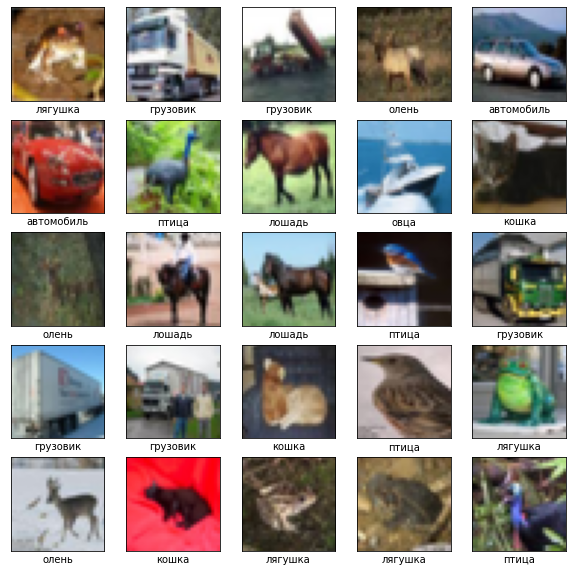

In [4]:
class_names = ['самолет', 'автомобиль', 'птица', 'кошка', 'олень', 'собака', 'лягушка', 'лошадь', 'овца', 'грузовик']
plt.figure(figsize = (10, 10))

for i in range(25):
  plt.subplot(5, 5, i+1)

  plt.xticks([])
  plt.yticks([])

  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)

  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.5451 - accuracy: 0.4358 - val_loss: 1.2528 - val_accuracy: 0.5550
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1483 - accuracy: 0.5954 - val_loss: 1.0779 - val_accuracy: 0.6234
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9765 - accuracy: 0.6598 - val_loss: 0.9325 - val_accuracy: 0.6769
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8677 - accuracy: 0.6964 - val_loss: 0.8760 - val_accuracy: 0.6955
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7932 - accuracy: 0.7228 - val_loss: 0.9031 - val_accuracy: 0.6922
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7271 - accuracy: 0.7463 - val_loss: 0.8744 - val_accuracy: 0.7020
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6776 - accuracy: 0.7646 - val_loss: 0.9037 -

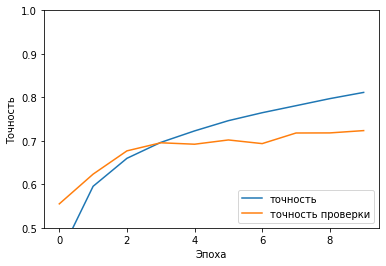

In [10]:
plt.plot(history.history['accuracy'], label = 'точность')
plt.plot(history.history['val_accuracy'], label = 'точность проверки')

plt.xlabel('Эпоха')
plt.ylabel('Точность')

plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [11]:
print(test_acc)

NameError: ignored